# Array Electrophysiology Analysis for the DataJoint Workflow: Exploration of Results


This notebook aims to explore the results obtained with the array electrophysiology pipeline. New cells can be added to explore each table's dependencies and attributes.

**_Note:_**

- The examples in this notebook use a sample dataset. Replace these entries with your actual database entries to access and analyze your data.



### **Key Steps**

- **Setup**

- **Step 1: Select Session of Interest**

- **Step 2: Explore Data in `Probe` Schema**

- **Step 3: Explore LFP**

- **Step 4: Explore Spike-Sorted Units in `Ephys` Schema**

- **Step 5: Explore the Waveforms**

  - **5.1. Plot Waveform for a Specific Unit**

  - **5.2. Plot Mean Waveforms for All Units**

- **Step 6: Visualization of Quality Metrics Results**

  - **6.1. Filtering by Cluster Quality Metrics**

  - **6.2. Filtering by Waveform Quality Metrics**


#### **Setup**


First, import the necessary packages for the data pipeline and essential schemas.


In [1]:
import os

if os.path.basename(os.getcwd()) == "notebooks":
    os.chdir("..")

In [2]:
import datajoint as dj
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from workflow.pipeline import culture, ephys, probe

[2024-07-16 17:19:03,498][INFO]: Connecting milagros@db.datajoint.com:3306
[2024-07-16 17:19:05,985][INFO]: Connected milagros@db.datajoint.com:3306


#### **Step 1: Select Session of Interest**


In [4]:
(culture.Experiment & 'organoid_id="O09"').proj(
    "experiment_end_time",
    "drug_name",
    "experiment_plan",
)

organoid_id e.g. O17,experiment_start_time,experiment_end_time,drug_name,"experiment_plan e.g. mrna lysate, oct, protein lysate, or matrigel embedding, ephys, tracing"
O09,2023-05-03 17:33:00,2023-05-18 12:15:00,Control,ephys
O09,2023-05-18 12:25:00,2023-05-18 18:15:00,4-AP,ephys
O09,2023-05-18 18:15:00,2023-05-19 09:30:00,No Drug,ephys
O09,2023-05-19 09:30:00,2023-05-19 15:35:00,Bicuculline,ephys
O09,2023-05-19 15:45:00,2023-05-20 15:40:00,Tetrodotoxin,ephys


Let's select the `4-AP` drug for organoid `O09`:

In [5]:
session_key = dict(
    organoid_id="O09",
    experiment_start_time="2023-05-18 12:25:00",
    insertion_number=0,
    start_time="2023-05-18 12:25:00",
    end_time="2023-05-18 12:30:00",
)

session_key

{'organoid_id': 'O09',
 'experiment_start_time': '2023-05-18 12:25:00',
 'insertion_number': 0,
 'start_time': '2023-05-18 12:25:00',
 'end_time': '2023-05-18 12:30:00'}

In [6]:
ephys.EphysSession * ephys.EphysSessionInfo & session_key

organoid_id e.g. O17,experiment_start_time,insertion_number,start_time,end_time,session_type,session_info Session header info from intan .rhd file. Get this from the first session file.
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,spike_sorting,=BLOB=


#### **Step 2: Explore Data in `Probe` Schema**

In [7]:
ephys.probe.ProbeType()

probe_type e.g. A1x32-6mm-100-177-H32_21mm,"probe_full_name full, non-abbreviated name of the probe"
A1x32-6mm-100-177-H32_21mm,None


The `probe.Probe` metadata is used by the downstream `ProbeInsertion` table:

In [8]:
probe.Probe()

probe unique identifier for this model of probe (e.g. serial number),probe_type e.g. A1x32-6mm-100-177-H32_21mm,probe_comment
12D4D,A1x32-6mm-100-177-H32_21mm,
12D51,A1x32-6mm-100-177-H32_21mm,
12D76,A1x32-6mm-100-177-H32_21mm,
12D77,A1x32-6mm-100-177-H32_21mm,
Q983,A1x32-6mm-100-177-H32_21mm,
T590,A1x32-6mm-100-177-H32_21mm,
T591,A1x32-6mm-100-177-H32_21mm,
T593,A1x32-6mm-100-177-H32_21mm,
T595,A1x32-6mm-100-177-H32_21mm,


In [9]:
ephys.Port()

port_id
A
B
C
D


In [10]:
ephys.EphysSessionProbe & session_key

organoid_id e.g. O17,experiment_start_time,insertion_number,start_time,end_time,probe unique identifier for this model of probe (e.g. serial number),port_id,"used_electrodes list of electrode IDs used in this session (if null, all electrodes are used)"
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,Q983,A,=BLOB=


In [11]:
ephys.EphysSessionInfo * ephys.EphysSessionProbe & session_key

organoid_id e.g. O17,experiment_start_time,insertion_number,start_time,end_time,session_info Session header info from intan .rhd file. Get this from the first session file.,probe unique identifier for this model of probe (e.g. serial number),port_id,"used_electrodes list of electrode IDs used in this session (if null, all electrodes are used)"
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,=BLOB=,Q983,A,=BLOB=


#### **Step 3: Explore LFP**


In [12]:
lfp_key = dict.copy(session_key)
lfp_key["end_time"] = "2023-05-18 12:40:00"
lfp_key

{'organoid_id': 'O09',
 'experiment_start_time': '2023-05-18 12:25:00',
 'insertion_number': 0,
 'start_time': '2023-05-18 12:25:00',
 'end_time': '2023-05-18 12:40:00'}

In [13]:
ephys.LFP & lfp_key

organoid_id e.g. O17,experiment_start_time,insertion_number,start_time,end_time,lfp_sampling_rate Down-sampled sampling rate (Hz).
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:40:00,2500.0


In [14]:
ephys.LFP.Trace & lfp_key

organoid_id e.g. O17,experiment_start_time,insertion_number,start_time,end_time,electrode_config_hash,probe_type e.g. A1x32-6mm-100-177-H32_21mm,"electrode electrode index, starts at 0",lfp
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:40:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,0,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:40:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,1,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:40:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,2,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:40:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,3,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:40:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,4,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:40:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,5,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:40:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,6,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:40:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,7,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:40:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,8,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:40:00,699af5e0-31fa-acc9-1aeb-132c6972d25e,A1x32-6mm-100-177-H32_21mm,9,=BLOB=


In [15]:
# Select electrode
electrode_index = 1

In [16]:
ephys.LFP.Trace.heading

# 
organoid_id          : varchar(4)                   # e.g. O17
experiment_start_time : datetime                     # 
insertion_number     : tinyint unsigned             # 
start_time           : datetime                     # 
end_time             : datetime                     # 
electrode_config_hash : uuid                         # 
probe_type           : varchar(64)                  # e.g. A1x32-6mm-100-177-H32_21mm
electrode            : int                          # electrode index, starts at 0
---
lfp                  : blob@datajoint-blob          # 

In [17]:
# Fetching
sampling_rate, lfp_trace = (
    ephys.LFP * ephys.LFP.Trace & lfp_key & f"electrode={electrode_index}"
).fetch1("lfp_sampling_rate", "lfp")

S3Error: S3 operation failed; code: InvalidObjectState, message: The operation is not valid for the object's access tier, resource: None, request_id: VN6PXXE2RG64M0N5, host_id: DkywkTxKOVSjAJenUlb6M2PM7r0GP8i5Zsw+i5UOBRCPWkACsgSICBVw+WBD/xW7P4snzR1lE+ryZaQroR8tZw==

In [ ]:
# Plotting
plt.figure()
plt.plot(time_stamp / sampling_rate * 1000, lfp_mean, color="black")
plt.xlabel("Time (ms)")
plt.ylabel(r"Mean of LFP across electrodes ($\mu$V)")
plt.suptitle(
    f"Average Local Field Potential (LFP) Waveform for insertion number {insertion_number}"
)
plt.show()

#### **Step 4: Explore Spike-Sorted Units in `Ephys` Schema**

In [ ]:
ephys.EphysSession & session_key

The catalog of all raw ephys files can be found in the `EphysRawFile` table:

In [ ]:
ephys.EphysRawFile()

Information about spike sorted units including **spike_times** is stored in the `ephys.CuratedClustering.Unit` table. Let's query the table below:

In [ ]:
ephys.CuratedClustering.Unit & session_key

To fetch and plot a raster plot of the first 16 electrodes in the `ephys.CuratedClustering.Unit` table, run the code in the cells below:

In [ ]:
# Fetching
units, unit_spiketimes = (ephys.CuratedClustering.Unit & session_key).fetch(
    "unit", "spike_times"
)

In [ ]:
# Plotting
units_subset = units[:10]
unit_spiketimes_subset = unit_spiketimes[:10]
x = np.hstack(unit_spiketimes_subset)
y = np.hstack(
    [np.full_like(s, u) for u, s in zip(units_subset, unit_spiketimes_subset)]
)
plt.figure()
plt.plot(x, y, "|")
plt.xlim(0, 15)
plt.xlabel("Time (s)")
plt.ylabel("Unit")
plt.show()

#### **Step 4: Explore the Waveforms**


In [18]:
ephys.WaveformSet & session_key

organoid_id e.g. O17,experiment_start_time,insertion_number,start_time,end_time,paramset_idx
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,0
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,1


In [19]:
ephys_key = dict(**session_key, paramset_idx=1)

In [20]:
ephys.WaveformSet & ephys_key

organoid_id e.g. O17,experiment_start_time,insertion_number,start_time,end_time,paramset_idx
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,1


In [21]:
ephys.WaveformSet.PeakWaveform & ephys_key

organoid_id e.g. O17,experiment_start_time,insertion_number,start_time,end_time,paramset_idx,unit,peak_electrode_waveform (uV) mean waveform for a given unit at its representative electrode
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,1,0,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,1,1,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,1,2,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,1,3,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,1,4,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,1,5,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,1,6,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,1,7,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,1,8,=BLOB=
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,1,9,=BLOB=


##### 4.1. Plot Waveform for a Specific Unit


In [22]:
# Get waveform for unit = 1
unit = 1

(ephys.WaveformSet.PeakWaveform & ephys_key & f"unit={unit}").fetch1(
    "peak_electrode_waveform"
)

array([  3.74399948,   3.65391135,   3.81966257,   4.1004591 ,
         4.32120132,   4.48656321,   4.45379829,   3.9549911 ,
         3.14535069,   2.37197948,   1.89774036,   1.54634953,
         0.75114006,  -0.55068016,  -1.95624065,  -3.0813911 ,
        -4.16090965,  -5.89680195,  -8.68490696, -11.67230415,
       -12.91095066, -11.50733757,  -8.29569149,  -5.31179953,
        -3.72917843,  -3.03186035,  -2.20232964,  -1.12397957,
         0.22307996,   1.40282965,   2.26394987,   2.96478081,
         3.55173135,   3.98579907,   4.16364145,   4.21863174,
         4.07510996,   3.874259  ,   3.86762929,   3.90312004,
         3.81536841,   3.40548086,   2.85012031,   2.31582117,
         2.01942086,   1.9238708 ,   1.68675077,   1.22225904,
         0.7179901 ,   0.2402401 ,  -0.12168002,  -0.34515005,
        -0.45785978,  -0.64506042,  -0.83889031,  -1.1505003 ,
        -1.49915993,  -1.71560955,  -1.81467068,  -1.55532026])

In [23]:
ephys.EphysSessionInfo & ephys_key

organoid_id e.g. O17,experiment_start_time,insertion_number,start_time,end_time,session_info Session header info from intan .rhd file. Get this from the first session file.
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,=BLOB=


In [24]:
(ephys.EphysSessionInfo & ephys_key).fetch1("session_info")

{'version': {'major': 3, 'minor': 2},
 'sample_rate': 20000.0,
 'notch_filter_frequency': 60,
 'notes': {'note1': '', 'note2': '', 'note3': ''},
 'num_temp_sensor_channels': 0,
 'eval_board_mode': 13,
 'num_samples_per_data_block': 128,
 'reference_channel': 'n/a',
 'frequency_parameters': {'dsp_enabled': 1,
  'actual_dsp_cutoff_frequency': 0.7772186398506165,
  'actual_lower_bandwidth': 0.09452909976243973,
  'actual_upper_bandwidth': 7603.76513671875,
  'desired_dsp_cutoff_frequency': 1.0,
  'desired_lower_bandwidth': 0.10000000149011612,
  'desired_upper_bandwidth': 7500.0,
  'notch_filter_frequency': 60,
  'desired_impedance_test_frequency': 1000.0,
  'actual_impedance_test_frequency': 1000.0,
  'amplifier_sample_rate': 20000.0,
  'aux_input_sample_rate': 5000.0,
  'supply_voltage_sample_rate': 156.25,
  'board_adc_sample_rate': 20000.0,
  'board_dig_in_sample_rate': 20000.0},
 'amplifier_channels': [{'port_name': 'Port A',
   'port_prefix': 'A',
   'port_number': 1,
   'native_cha

In [26]:
# Plot the waveform and auto-correlogram
from element_array_ephys.plotting.unit_level import (
    plot_auto_correlogram,
    plot_waveform,
)

sampling_rate = (ephys.EphysSessionInfo & ephys_key).fetch1("session_info")[
    "sample_rate"
] / 1e3  # in kHz

peak_electrode_waveform, spike_times, cluster_quality_label = (
    (ephys.CuratedClustering.Unit & ephys_key & f"unit={unit}")
    * ephys.WaveformSet.PeakWaveform
).fetch1("peak_electrode_waveform", "spike_times", "cluster_quality_label")

# Get the figure
waveform_fig = plot_waveform(
    waveform=peak_electrode_waveform, sampling_rate=sampling_rate
)

correlogram_fig = plot_auto_correlogram(
    spike_times=spike_times, bin_size=0.001, window_size=1
)

display(waveform_fig)
display(correlogram_fig)

##### 4.2. Plot Mean Waveforms for All Units


In [27]:
peak_wfs = (ephys.WaveformSet.PeakWaveform & ephys_key).fetch("peak_electrode_waveform")
peak_wf_timestamps = np.arange(len(peak_wfs[0])) / sampling_rate  # ms

Plot the overlay of all the detected signals:

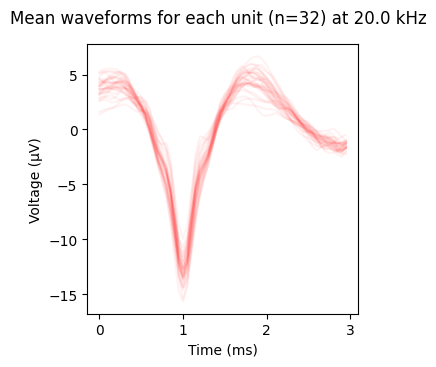

In [28]:
fig = plt.figure(figsize=(3.5, 3.5))
for idx in range(len(peak_wfs)):
    plt.plot(peak_wf_timestamps, peak_wfs[idx], color="red", alpha=0.05)
plt.suptitle(f"Mean waveforms for each unit (n={len(peak_wfs)}) at {sampling_rate} kHz")
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (μV)")
plt.show()

#### **Step 5:Visualization of Quality Metrics Results**


In [29]:
ephys.QualityMetrics & ephys_key

organoid_id e.g. O17,experiment_start_time,insertion_number,start_time,end_time,paramset_idx
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,1


##### 5.1. Filtering by Cluster Quality Metrics


In [30]:
cluster_query = ephys.QualityMetrics.Cluster & ephys_key
cluster_query

organoid_id e.g. O17,experiment_start_time,insertion_number,start_time,end_time,paramset_idx,unit,firing_rate (Hz) firing rate for a unit,snr signal-to-noise ratio for a unit,presence_ratio fraction of time in which spikes are present,isi_violation rate of ISI violation as a fraction of overall rate,number_violation total number of ISI violations,amplitude_cutoff estimate of miss rate based on amplitude histogram,isolation_distance distance to nearest cluster in Mahalanobis space,l_ratio,d_prime Classification accuracy based on LDA,nn_hit_rate Fraction of neighbors for target cluster that are also in target cluster,nn_miss_rate Fraction of neighbors outside target cluster that are in target cluster,silhouette_score Standard metric for cluster overlap,max_drift Maximum change in spike depth throughout recording,cumulative_drift Cumulative change in spike depth throughout recording,contamination_rate
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,1,0,44.7033,2.45591,1.0,0.618832,1113,0.000274574,26.6082,0.258964,3.99039,0.7905,0.0065,0.171639,0.0,0.0,1.0
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,1,1,33.7233,2.62694,1.0,0.512927,525,0.000120256,37.5592,0.102417,4.49964,0.854,0.0035,0.183584,0.0,0.0,1.0
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,1,2,34.2267,2.45192,1.0,0.478983,505,0.0002101,35.4288,0.140741,4.19877,0.8245,0.0055,0.18335,0.0,0.0,0.677997
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,1,3,41.84,2.75082,1.0,0.469684,740,0.000227257,36.4776,0.120086,4.3397,0.8485,0.00475,0.173733,0.0,0.0,0.614181
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,1,4,35.7067,2.53743,1.0,0.534219,613,4.32367e-05,38.1416,0.0793707,4.49908,0.8695,0.00775,0.191904,0.0,0.0,1.0
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,1,5,44.7433,2.52138,1.0,0.404047,728,0.000150992,40.9538,0.0796781,4.47506,0.8635,0.00625,0.186144,0.0,0.0,0.489386
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,1,6,37.2833,2.48248,1.0,0.474005,593,0.000881477,86.7992,0.0190059,4.4246,0.9485,0.048,0.253058,0.0,0.0,0.646829
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,1,7,26.6967,2.2829,1.0,0.523821,336,0.000244946,33.1973,0.133591,4.2983,0.8495,0.005,0.187947,0.0,0.0,1.0
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,1,8,39.21,2.36046,1.0,0.361355,500,0.000147469,35.7281,0.111778,4.28933,0.8595,0.00425,0.19035,0.0,0.0,0.500173
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,1,9,33.3567,2.34262,1.0,0.492311,493,0.000305891,33.1999,0.119734,4.42177,0.8525,0.00525,0.186775,0.0,0.0,0.789433


In [31]:
cluster_query.heading

# Cluster metrics for a particular unit
organoid_id          : varchar(4)                   # e.g. O17
experiment_start_time : datetime                     # 
insertion_number     : tinyint unsigned             # 
start_time           : datetime                     # 
end_time             : datetime                     # 
paramset_idx         : smallint                     # 
unit                 : int                          # 
---
firing_rate=null     : float                        # (Hz) firing rate for a unit
snr=null             : float                        # signal-to-noise ratio for a unit
presence_ratio=null  : float                        # fraction of time in which spikes are present
isi_violation=null   : float                        # rate of ISI violation as a fraction of overall rate
number_violation=null : int                          # total number of ISI violations
amplitude_cutoff=null : float                        # estimate of miss rate based on amplitude histog

In [32]:
len(ephys.QualityMetrics.Cluster & ephys_key)

32

In [34]:
filtered_key = (
    ephys.QualityMetrics.Cluster
    & ephys_key
    & "presence_ratio > 0.95"
    & "contamination_rate < 0.8"
).fetch("KEY")
peak_wfs = (ephys.WaveformSet.PeakWaveform & filtered_key).fetch(
    "peak_electrode_waveform"
)
sampling_rate = (ephys.EphysSessionInfo & filtered_key).fetch1("session_info")[
    "sample_rate"
] / 1e3  # sampling rate in kHz
peak_wf_timestamps = np.arange(len(peak_wfs[0])) / sampling_rate  # ms

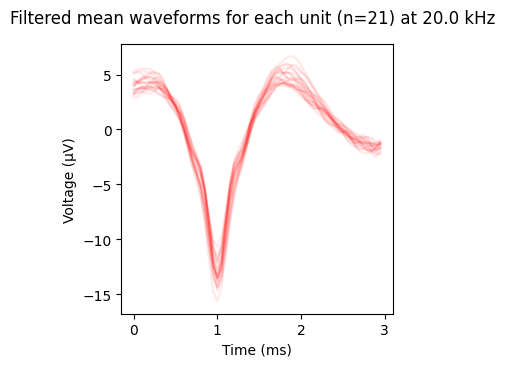

In [35]:
# plot waveforms
fig = plt.figure(figsize=(3.5, 3.5))
for idx in range(len(peak_wfs)):
    plt.plot(peak_wf_timestamps, peak_wfs[idx], color="red", alpha=0.09)
plt.suptitle(
    f"Filtered mean waveforms for each unit (n={len(peak_wfs)}) at {sampling_rate} kHz"
)
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (μV)")
plt.show()

##### 5.2. Filtering by Waveform Quality Metrics


In [36]:
wf_query = ephys.QualityMetrics.Waveform & ephys_key
wf_query

organoid_id e.g. O17,experiment_start_time,insertion_number,start_time,end_time,paramset_idx,unit,amplitude (uV) absolute difference between waveform peak and trough,duration (ms) time between waveform peak and trough,halfwidth (ms) spike width at half max amplitude,pt_ratio absolute amplitude of peak divided by absolute amplitude of trough relative to 0,repolarization_slope the repolarization slope was defined by fitting a regression line to the first 30us from trough to peak,recovery_slope the recovery slope was defined by fitting a regression line to the first 30us from peak to tail,spread (um) the range with amplitude above 12-percent of the maximum amplitude along the probe,velocity_above (s/m) inverse velocity of waveform propagation from the soma toward the top of the probe,velocity_below (s/m) inverse velocity of waveform propagation from the soma toward the bottom of the probe
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,1,0,-9.555,0.00062,0.00023,-0.241835,35015.7,-2301.64,0.0,nan,nan
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,1,1,-12.285,0.000745,0.00027,-0.326784,33418.9,-5696.13,0.0,nan,nan
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,1,2,-12.675,0.000735,0.00026,-0.3289,36164.7,-5744.16,0.0,nan,nan
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,1,3,-12.3825,0.00075,0.00026,-0.339903,33851.9,-5715.39,0.0,nan,nan
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,1,4,-15.015,0.000805,0.000265,-0.351592,44949.6,-9028.7,0.0,nan,nan
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,1,5,-13.26,0.00072,0.000295,-0.396584,36574.8,-7082.93,0.0,nan,nan
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,1,6,-13.065,0.000705,0.0003,-0.422852,38696.7,-7232.85,0.0,nan,nan
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,1,7,-12.48,0.000785,0.000335,-0.415374,32865.4,-8344.88,0.0,nan,nan
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,1,8,-14.43,0.000915,0.000325,-0.413178,38703.7,-10111.6,0.0,nan,nan
O09,2023-05-18 12:25:00,0,2023-05-18 12:25:00,2023-05-18 12:30:00,1,9,-11.505,0.000825,0.000305,-0.371703,32242.8,-6144.37,0.0,nan,nan


In [37]:
wf_query.heading

# Waveform metrics for a particular unit
organoid_id          : varchar(4)                   # e.g. O17
experiment_start_time : datetime                     # 
insertion_number     : tinyint unsigned             # 
start_time           : datetime                     # 
end_time             : datetime                     # 
paramset_idx         : smallint                     # 
unit                 : int                          # 
---
amplitude=null       : float                        # (uV) absolute difference between waveform peak and trough
duration=null        : float                        # (ms) time between waveform peak and trough
halfwidth=null       : float                        # (ms) spike width at half max amplitude
pt_ratio=null        : float                        # absolute amplitude of peak divided by absolute amplitude of trough relative to 0
repolarization_slope=null : float                        # the repolarization slope was defined by fitting a regression line

In [61]:
len(ephys.QualityMetrics.Waveform & ephys_key & "pt_ratio < -0.35")

21

In [62]:
filtered_key = (ephys.QualityMetrics.Waveform & ephys_key & "pt_ratio < -0.35").fetch(
    "KEY"
)
peak_wfs = (ephys.WaveformSet.PeakWaveform & filtered_key).fetch(
    "peak_electrode_waveform"
)
sampling_rate = (ephys.EphysSessionInfo & filtered_key).fetch1("session_info")[
    "sample_rate"
] / 1e3  # sampling rate in kHz
peak_wf_timestamps = np.arange(len(peak_wfs[0])) / sampling_rate  # ms

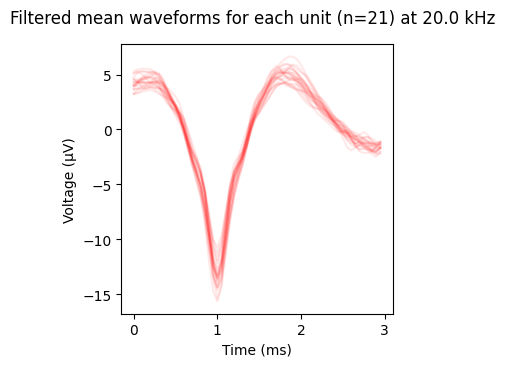

In [63]:
# plot waveforms
fig = plt.figure(figsize=(3.5, 3.5))
for idx in range(len(peak_wfs)):
    plt.plot(peak_wf_timestamps, peak_wfs[idx], color="red", alpha=0.09)
plt.suptitle(
    f"Filtered mean waveforms for each unit (n={len(peak_wfs)}) at {sampling_rate} kHz"
)
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (μV)")
plt.show()